In [41]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# load, read, and convert to DF
file_path = 'C:/Users/ciinc/OneDrive/Documents/project4_plana.xlsx'
xl = pd.ExcelFile(file_path)

department_of_labor_df = xl.parse('Department of Labor')

department_of_commerce_df = xl.parse('Department of Commerce')

In [43]:
# drop blanks
cleaned_commerce_df = department_of_commerce_df.dropna(axis=0, how='any').copy()
print(cleaned_commerce_df)

           RandomID agency   Q1   Q2   Q3   Q4   Q5   Q6   Q7 Q8  ...  DRNO  \
1      159842000000     CM  4.0  4.0  5.0  5.0  2.0  4.0  5.0  4  ...     B   
2      160709000000     CM  5.0  5.0  5.0  5.0  4.0  5.0  5.0  5  ...     B   
5      134199000000     CM  5.0  4.0  5.0  5.0  5.0  4.0  5.0  5  ...     B   
6      192942000000     CM  4.0  4.0  4.0  4.0  1.0  3.0  4.0  4  ...     B   
8      134976000000     CM  4.0  2.0  4.0  4.0  2.0  4.0  4.0  4  ...     D   
...             ...    ...  ...  ...  ...  ...  ...  ...  ... ..  ...   ...   
21002  118558000000     CM  5.0  4.0  5.0  5.0  5.0  5.0  5.0  3  ...     A   
21003  147105000000     CM  5.0  4.0  5.0  5.0  5.0  4.0  5.0  X  ...     A   
21004  165175000000     CM  5.0  5.0  5.0  3.0  4.0  3.0  4.0  5  ...     B   
21005  197454000000     CM  5.0  4.0  5.0  5.0  4.0  5.0  5.0  5  ...     A   
21006  106631000000     CM  4.0  4.0  4.0  4.0  3.0  4.0  4.0  4  ...     C   

       DHISP  DDIS DAGEGRP  DSUPER  DFEDTEN  DSEX  

In [44]:
# drop non-numerical characters (X and Y)
cleaned_commerce_df = cleaned_commerce_df.applymap(str)
contains_XY_rows = cleaned_commerce_df.apply(lambda row: row.str.contains(r'[XY]', case=False)).any(axis=1)
cleaned2_commerce_df = cleaned_commerce_df[~contains_XY_rows].copy()
print(cleaned2_commerce_df)

           RandomID agency   Q1   Q2   Q3   Q4   Q5   Q6   Q7 Q8  ... DRNO  \
1      159842000000     CM  4.0  4.0  5.0  5.0  2.0  4.0  5.0  4  ...    B   
5      134199000000     CM  5.0  4.0  5.0  5.0  5.0  4.0  5.0  5  ...    B   
10     116586000000     CM  4.0  4.0  4.0  4.0  3.0  4.0  4.0  4  ...    B   
16     196458000000     CM  5.0  4.0  4.0  5.0  2.0  4.0  5.0  3  ...    C   
19     158782000000     CM  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5  ...    C   
...             ...    ...  ...  ...  ...  ...  ...  ...  ... ..  ...  ...   
20983  190995000000     CM  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4  ...    C   
20996  146714000000     CM  5.0  5.0  5.0  5.0  5.0  4.0  4.0  4  ...    B   
21000  183904000000     CM  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5  ...    C   
21005  197454000000     CM  5.0  4.0  5.0  5.0  4.0  5.0  5.0  5  ...    A   
21006  106631000000     CM  4.0  4.0  4.0  4.0  3.0  4.0  4.0  4  ...    C   

      DHISP DDIS DAGEGRP DSUPER DFEDTEN DSEX DMIL DLEAVING     

In [48]:
columns_to_keep = ['Q85', 'Q86', 'Q87', 'Q88', 'Q89', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q84', 'Q55', 'Q56', 'Q57', 'Q59', 'Q60', 'Q71', 'Q72', 'Q46', 'Q48', 'Q49', 'Q50','Q52']

columns_to_remove = [col for col in cleaned2_commerce_df.columns if col.startswith('Q') and col not in columns_to_keep]

# Drop the unwanted columns
cleaned2_commerce_df = cleaned2_commerce_df.drop(columns=columns_to_remove)
cleaned2_commerce_df

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q59,Q60,Q71,Q72,Q84,Q85,Q86,Q87,Q88,Q89
1,4.0,5.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,4,4,4,5,4,4.0,4.0,4.0,4.0,4.0
5,4.0,5.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0
10,4.0,4.0,4.0,4.0,4.0,5,5.0,5.0,5.0,5.0,...,4,2,4,5,4,4.0,4.0,4.0,4.0,4.0
16,4.0,4.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0
19,5.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20983,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,...,4,4,4,4,4,4.0,4.0,4.0,4.0,4.0
20996,5.0,5.0,5.0,4.0,4.0,4,4.0,4.0,4.0,4.0,...,4,4,3,4,4,4.0,4.0,4.0,4.0,4.0
21000,5.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0
21005,4.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,4,5.0,5.0,4.0,4.0,4.0


In [49]:
commercedept_cleaned_df = cleaned2_commerce_df

In [50]:
commercedept_cleaned_df.head(20)

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q59,Q60,Q71,Q72,Q84,Q85,Q86,Q87,Q88,Q89
1,4.0,5.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,4,4,4,5,4,4.0,4.0,4.0,4.0,4.0
5,4.0,5.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0
10,4.0,4.0,4.0,4.0,4.0,5,5.0,5.0,5.0,5.0,...,4,2,4,5,4,4.0,4.0,4.0,4.0,4.0
16,4.0,4.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0
19,5.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0
31,5.0,4.0,4.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,2,4,5,5.0,5.0,5.0,5.0,5.0
42,5.0,4.0,4.0,5.0,4.0,5,5.0,5.0,5.0,5.0,...,5,4,5,4,4,4.0,4.0,4.0,5.0,5.0
43,5.0,5.0,4.0,4.0,4.0,5,5.0,5.0,5.0,5.0,...,5,5,4,4,4,4.0,4.0,5.0,5.0,5.0
73,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,5.0,...,4,4,4,4,4,3.0,4.0,4.0,4.0,4.0
74,4.0,5.0,4.0,4.0,4.0,5,5.0,5.0,5.0,5.0,...,5,4,5,5,4,5.0,5.0,5.0,5.0,5.0


In [51]:
# Create a Recode column to store the dummy variable (initially set as 0)
commercedept_cleaned_df['Recodes_Done'] = 0

# Check if any value in a row has changed from its original state (indicating recodes)
for index, row in commercedept_cleaned_df.iterrows():
    original_row = row[:-1]
    if not original_row.equals(row[:-1]):
        commercedept_cleaned_df.loc[index, 'Recodes_Done'] = 1

In [52]:
# reassign labordept_cleaned_df
recoded_commerce_df = commercedept_cleaned_df.copy()

# Replace values based on conditions
recoded_commerce_df.replace({0: 'No', 1: 'Yes', 2: 'Yes', 3: 'Yes', 4: 'Yes', 5: 'Yes'}, inplace=True)

In [53]:
recoded_commerce_df.head()

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q60,Q71,Q72,Q84,Q85,Q86,Q87,Q88,Q89,Recodes_Done
1,4.0,5.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,4,4,5,4,4.0,4.0,4.0,4.0,4.0,No
5,4.0,5.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5.0,5.0,5.0,5.0,5.0,No
10,4.0,4.0,4.0,4.0,4.0,5,5.0,5.0,5.0,5.0,...,2,4,5,4,4.0,4.0,4.0,4.0,4.0,No
16,4.0,4.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5.0,5.0,5.0,5.0,5.0,No
19,5.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5.0,5.0,5.0,5.0,5.0,No


In [55]:
# assign list of columns to DF
selected_columns = ['Q85', 'Q86', 'Q87', 'Q88', 'Q89', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q84', 'Q55', 'Q56', 'Q57', 'Q59', 'Q60', 'Q71', 'Q72', 'Q46', 'Q48', 'Q49', 'Q50','Q52']
selected_commerce_df = commercedept_cleaned_df[selected_columns].copy()
selected_commerce_df.head()

,Q85,Q86,Q87,Q88,Q89,Q2,Q3,Q4,Q6,Q7,...,Q57,Q59,Q60,Q71,Q72,Q46,Q48,Q49,Q50,Q52
1,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,...,3,4,4,4,5,5,5.0,5.0,5.0,5.0
5,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,...,5,5,5,5,5,5,5.0,5.0,5.0,5.0
10,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3,4,2,4,5,5,5.0,5.0,5.0,5.0
16,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,...,5,5,5,5,5,5,5.0,5.0,5.0,5.0
19,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5,5,5,5,5,5,5.0,5.0,5.0,5.0


In [56]:
print(selected_commerce_df.dtypes)

Q85    object
Q86    object
Q87    object
Q88    object
Q89    object
Q2     object
Q3     object
Q4     object
Q6     object
Q7     object
Q84    object
Q55    object
Q56    object
Q57    object
Q59    object
Q60    object
Q71    object
Q72    object
Q46    object
Q48    object
Q49    object
Q50    object
Q52    object
dtype: object


In [57]:
selected_commerce_df.head()

,Q85,Q86,Q87,Q88,Q89,Q2,Q3,Q4,Q6,Q7,...,Q57,Q59,Q60,Q71,Q72,Q46,Q48,Q49,Q50,Q52
1,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,...,3,4,4,4,5,5,5.0,5.0,5.0,5.0
5,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,...,5,5,5,5,5,5,5.0,5.0,5.0,5.0
10,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3,4,2,4,5,5,5.0,5.0,5.0,5.0
16,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,...,5,5,5,5,5,5,5.0,5.0,5.0,5.0
19,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5,5,5,5,5,5,5.0,5.0,5.0,5.0


In [58]:
# count frequencies of each value for each quarter
selected_commerce_df = selected_commerce_df.apply(pd.to_numeric, errors='coerce')
score_counts = pd.crosstab(index=selected_commerce_df.stack(), columns=selected_commerce_df.stack().index.get_level_values(1))
score_counts = score_counts.reindex(index=[0, 1, 2, 3, 4, 5])
print(score_counts)

col_0      Q2      Q3      Q4     Q46     Q48     Q49     Q50     Q52     Q55  \
row_0                                                                           
0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1        83.0    54.0    39.0    61.0    45.0    37.0    61.0    54.0   190.0   
2       235.0   140.0    72.0    79.0    95.0    54.0   105.0    68.0   291.0   
3       358.0   260.0   172.0   193.0   131.0   119.0   206.0   212.0   477.0   
4      1095.0  1212.0  1266.0   989.0   810.0   751.0   729.0   662.0  1116.0   
5      1036.0  1141.0  1258.0  1485.0  1726.0  1846.0  1706.0  1811.0   733.0   

col_0     Q56  ...     Q60      Q7     Q71     Q72     Q84     Q85     Q86  \
row_0          ...                                                           
0         NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1       131.0  ...   119.0    29.0    82.0    59.0    60.0    80.0    61.0   
2       148.0  ...   182.0    51.0    8

<Axes: xlabel='col_0', ylabel='col_0'>

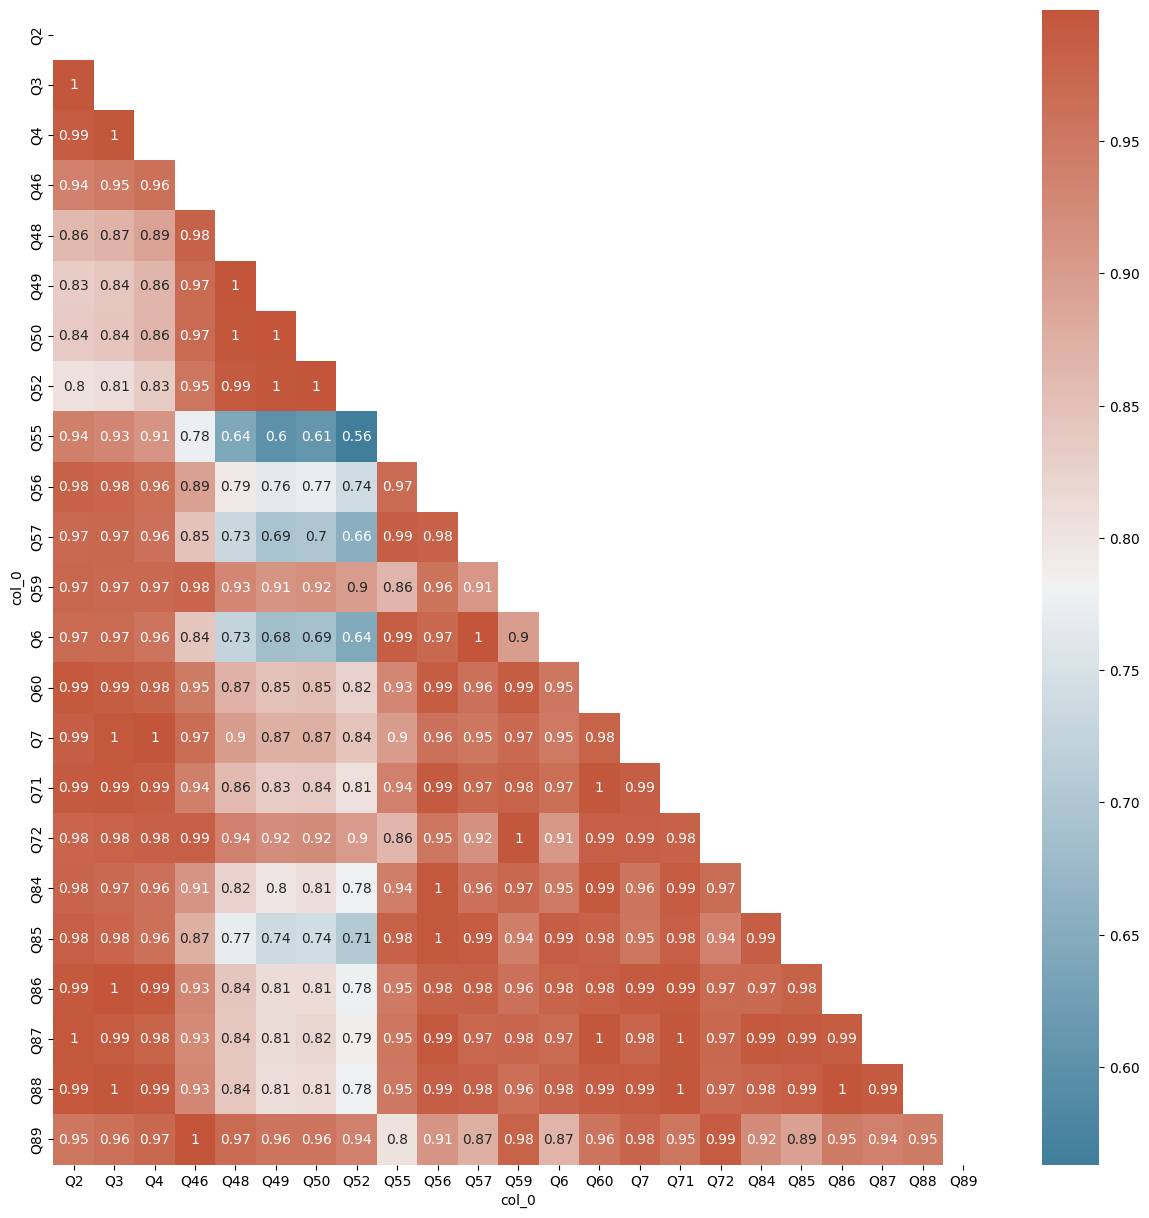

In [59]:
# Create Correlation Heatmap Matrix 
heatmap = score_counts.corr()
f, ax = plt.subplots(figsize=(15, 15))

mask = np.triu(np.ones_like(heatmap, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(heatmap, annot=True, mask = mask, cmap=cmap)

In [60]:
# Assuming you have already generated the correlation matrix heatmap and stored it in the variable `heatmap`

# Filter the correlation matrix to identify variables with correlations above 0.8
high_correlation_08 = (heatmap > 0.8)
np.fill_diagonal(high_correlation_08.values, False)  # Exclude self-correlation

# Find indices where the condition is True
indices_08 = np.where(high_correlation_08)

# Extract variable pairs with correlations above 0.8
correlated_variables_08 = [(heatmap.index[i], heatmap.columns[j]) for i, j in zip(*indices_08)]

# Display variables correlated more than 0.8
print("Variables correlated more than 0.8:")
for var1, var2 in correlated_variables_08:
    print(f"{var1} - {var2}: {heatmap.loc[var1, var2]}")


Variables correlated more than 0.8:
Q2 - Q3: 0.9965615362735789
Q2 - Q4: 0.9895657853351045
Q2 - Q46: 0.9397035581017652
Q2 - Q48: 0.8615531087003091
Q2 - Q49: 0.8319658135932275
Q2 - Q50: 0.83719869283277
Q2 - Q52: 0.8040031381243405
Q2 - Q55: 0.9413084993074333
Q2 - Q56: 0.9820813340973521
Q2 - Q57: 0.971589459888993
Q2 - Q59: 0.9745875577919084
Q2 - Q6: 0.9704504635553383
Q2 - Q60: 0.9930965007462832
Q2 - Q7: 0.9867574838445485
Q2 - Q71: 0.992878568313334
Q2 - Q72: 0.976323254556682
Q2 - Q84: 0.979029096485215
Q2 - Q85: 0.984566277160617
Q2 - Q86: 0.9933876096632175
Q2 - Q87: 0.9951473007262831
Q2 - Q88: 0.9929900657264308
Q2 - Q89: 0.9528825167628655
Q3 - Q2: 0.9965615362735789
Q3 - Q4: 0.9976202802496915
Q3 - Q46: 0.9475407513629448
Q3 - Q48: 0.8700390843947924
Q3 - Q49: 0.840880244658867
Q3 - Q50: 0.843329294000503
Q3 - Q52: 0.8100697656655576
Q3 - Q55: 0.9330307697676018
Q3 - Q56: 0.9771541626767762
Q3 - Q57: 0.9727854933289736
Q3 - Q59: 0.9711798992050426
Q3 - Q6: 0.97015740098

In [61]:
# Assuming you have already generated the correlation matrix heatmap and stored it in the variable `heatmap`

# Filter the correlation matrix to identify variables with correlations above 0.8
high_correlation_08 = (heatmap > 0.8)
np.fill_diagonal(high_correlation_08.values, False)  # Exclude self-correlation

# Count the number of variables that are highly correlated (above 0.8)
count_highly_correlated_08 = np.sum(high_correlation_08)

print(f"There are {count_highly_correlated_08} pairs of variables highly correlated (above 0.8).")


There are col_0
Q2     22
Q3     22
Q4     22
Q46    21
Q48    17
Q49    16
Q50    17
Q52    13
Q55    17
Q56    18
Q57    18
Q59    22
Q6     18
Q60    22
Q7     22
Q71    22
Q72    22
Q84    20
Q85    18
Q86    21
Q87    21
Q88    21
Q89    22
dtype: int64 pairs of variables highly correlated (above 0.8).
